In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
# Import dataset and clean it
df= pd.read_csv('C:/Users/Administrator/Desktop/Sentinel Hulu Perak/sentinel Hulu Perak Mac 2019/Sampel hulu perak/HuluPerak_training.csv', sep=",", decimal='.' )
df.head()

,id,poly_id,point_id,id_2,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
0,0,0,0,3.0,297,557,364,989,2630,3139,3300,3485,1859,874
1,1,0,1,3.0,268,512,270,954,2831,3417,3609,3669,1809,834
2,2,0,2,3.0,297,568,312,954,2831,3417,3683,3669,1809,834
3,3,0,3,3.0,345,590,351,989,2630,3139,3199,3485,1859,874
4,4,0,4,3.0,298,525,305,948,2922,3559,3716,3999,1884,840


In [4]:
filters = [(df.id_2 == 1), (df.id_2 == 2), (df.id_2 == 3),(df.id_2 == 4),
           (df.id_2 == 5), (df.id_2 == 6), (df.id_2 == 7)]

values = ["Water Body", "Build up Area", "Rubber", "Palm Oil", "Other vegetation", "Forest", "Bare Land"]   

df ["Class_name"] = np.select(filters, values)
df.drop(['id','poly_id','point_id'],axis=1, inplace=True)
df.rename(columns= {'id_2': 'Class_id'}, inplace=True)
df=df[['Class_name','Class_id','BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']]
df.head()

,Class_name,Class_id,BD1,BD2,BD3,BD4,BD5,BD6,BD7,BD8,BD9,BD10
0,Rubber,3.0,297,557,364,989,2630,3139,3300,3485,1859,874
1,Rubber,3.0,268,512,270,954,2831,3417,3609,3669,1809,834
2,Rubber,3.0,297,568,312,954,2831,3417,3683,3669,1809,834
3,Rubber,3.0,345,590,351,989,2630,3139,3199,3485,1859,874
4,Rubber,3.0,298,525,305,948,2922,3559,3716,3999,1884,840


In [5]:
print(df.isnull().sum())

Class_name     0
Class_id      19
BD1            0
BD2            0
BD3            0
BD4            0
BD5            0
BD6            0
BD7            0
BD8            0
BD9            0
BD10           0
dtype: int64


In [6]:
dfclass1 = df[(df.Class_id == 1)]
dfclass2 = df[(df.Class_id == 2)]
dfclass3 = df[(df.Class_id == 3)]
dfclass4 = df[(df.Class_id == 4)]
dfclass5 = df[(df.Class_id == 5)]
dfclass6 = df[(df.Class_id == 6)]
dfclass7 = df[(df.Class_id == 7)]

<AxesSubplot:>

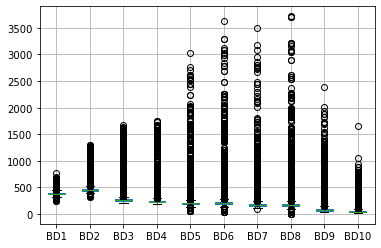

In [7]:
dfclass1.boxplot(column= ['BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10'])

In [8]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

In [11]:
#create new column in dataframe that contains Mahalanobis distance for each row
dfclass4['mahalanobis'] = mahalanobis(x=dfclass4, data=dfclass4[['Class_id', 'BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


LinAlgError: Singular matrix

In [12]:
df['mahalanobis'] = mahalanobis(x=df, data=df[['Class_id', 'BD1', 'BD2', 'BD3', 'BD4', 'BD5', 'BD6', 'BD7', 'BD8', 'BD9', 'BD10']])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ValueError: shapes (667075,12) and (11,11) not aligned: 12 (dim 1) != 11 (dim 0)